<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligecia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 30px; font-style: normal; text-align:center;">

Aprendizaje de Máquinas

Trabajo práctico integrador

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal;">

<u>Autores</u>:
- Karen Raczkowski @raczki
- Juan Ignacio Ribet @Juaniribet
- Martín Caceres
- FS @BenjaSar

</span>

## Tabla de contenido
<a id='volver'></a>
----

1. [Carga del dataSet](#Carga-del-data-set)<br>
1.1 [Verificamos si algún  color solo está  presente en una clase](#Verificamos-si-algún-color-solo-está-presente-en-una-clase)<br>
1.2 [Verificamos si algún  material solo está  presente en una clase](#Verificamos-si-algún-material-solo-está-presente-en-una-clase)<br>
1.3 [Balance de clases](#Verificar-el-balance-de-clases)<br>
2. [Función evaluar](#Creamos-la-función-'evaluar')<br>
3. [Split Data Set](#Separamos-el-dataset)<br> 
4. Modelos<br>
4.1 [Logistic Regression CV](#LogisticRegressionCV)<br>
4.2 [XGB Classifier](#XGB-Classifier)<br>
4.3 [Logistic Regression with ROS](#Logistic-Regression-with-ROS)<br>
4.4 [SMOTE](#SMOTE)<br>
4.5 [Cat Boost Classifier](#CatBoostClassifier)<br>
4.6 [RandomForestClassifier](#RandomForestClassifier)<br>
4.7 [Bagging - Tree Classifier](#Bagging)<br>
5. [Comparacion de los modelos (Falta!!)](#Comparacion-de-los-modelos)<br>
6. [Auto ML](#Auto-ML-:-PYCARET) <br>
7. [Conclusiones](#concluciones) <br>


In [34]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier


#Import to balance data
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

#Auto ML - Pycaret
import mlflow
from pycaret.classification import *
from pycaret.datasets import get_data

### Carga del data set

In [5]:
#carga del data set
data = pd.read_csv("./data/df_encoded.csv")
# Cambio nombre de columna themes 
data.rename(columns={'0': 'themes'}, inplace=True)
# Muevo themes (target) a la primera columna
cols = data.columns.tolist()
cols = [cols[-1]] + cols[:-1]
data = data[cols]
data.head()

,themes,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,beige,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,7,43,0.0,0.0,0.395349,0.0,0.302326,0.023256,0.093023,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511628,0.0,0.0
1,7,3,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2,18,0.0,0.0,0.111111,0.0,0.388889,0.277778,0.222222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,2,7,0.0,0.0,0.285714,0.0,0.142857,0.285714,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,2,29,0.0,0.0,0.034483,0.0,0.379310,0.310345,0.275862,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [6]:
#Nombre de las clases (tematicas de Lego)
clases = {'City': 0, 'Creator': 1, 'Duplo': 2, 'Educational and Dacta': 3, 'Friends': 4, 'Ninjago': 5, 'Star Wars': 6, 'Technic': 7, 'Town': 8, 'Universal Building Set': 9}
inv_clases = {v: k for k, v in clases.items()}
clases_list = list(clases.keys())

In [7]:
print(data.describe())

            themes  quantity_part        negro         gris       blanco  \
count  6732.000000    6732.000000  6732.000000  6732.000000  6732.000000   
mean      4.240790     232.687760     0.170670     0.080029     0.113409   
std       2.796274     458.384963     0.194104     0.132318     0.156090   
min       0.000000       1.000000     0.000000     0.000000     0.000000   
25%       2.000000      25.000000     0.015370     0.000000     0.000000   
50%       4.000000      74.000000     0.121951     0.000000     0.047619   
75%       7.000000     252.000000     0.250000     0.125000     0.185760   
max       9.000000    7663.000000     1.000000     1.000000     1.000000   

            gris_2         rojo         azul     amarillo        beige  ...  \
count  6732.000000  6732.000000  6732.000000  6732.000000  6732.000000  ...   
mean      0.056853     0.119167     0.064037     0.088573     0.017913  ...   
std       0.111552     0.154378     0.111766     0.133566     0.054816  ...   

In [8]:
# Describe agrupado por lego theme
grouped_df = data.groupby('themes').describe()
grouped_df = grouped_df.rename(index=inv_clases)
print(grouped_df)

                       quantity_part                                      \
                               count        mean         std  min    25%   
themes                                                                     
City                           739.0  241.136671  268.437351  1.0  38.00   
Creator                        493.0  421.316430  677.073393  1.0  62.00   
Duplo                         1233.0   36.351987   38.204882  1.0  10.00   
Educational and Dacta          573.0  218.022688  440.073859  1.0  24.00   
Friends                        530.0  232.758491  296.843594  1.0  36.00   
Ninjago                        512.0  267.835938  562.005001  1.0  11.00   
Star Wars                      832.0  397.959135  705.573794  1.0  55.00   
Technic                        772.0  350.419689  574.583738  1.0  39.75   
Town                           637.0  125.671900  164.090453  2.0  26.00   
Universal Building Set         411.0  166.965937  227.600535  1.0  14.50   

           

## Verificamos si algún color solo está presente en una clase

[inicio](#Tabla-de-contenido)

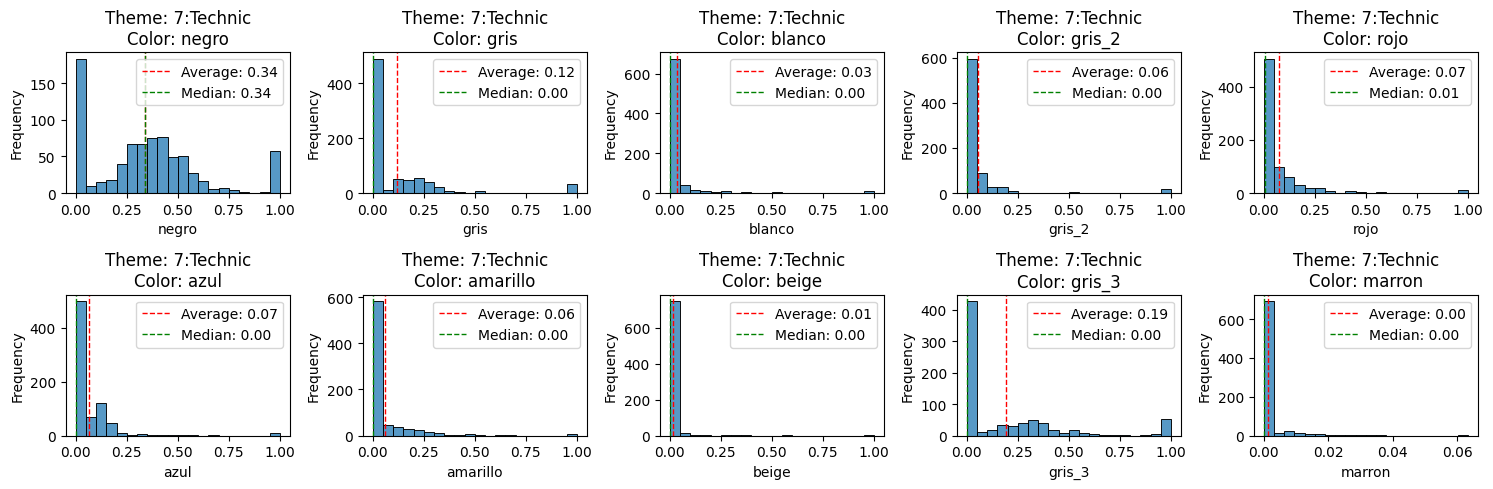

Descriptive Metrics for Theme 7:
            negro        gris      blanco      gris_2        rojo        azul  \
count  772.000000  772.000000  772.000000  772.000000  772.000000  772.000000   
mean     0.340176    0.117138    0.034376    0.055548    0.073240    0.065462   
std      0.273709    0.224572    0.122414    0.169555    0.153793    0.140851   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.099306    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.340580    0.000000    0.000000    0.000000    0.005306    0.000000   
75%      0.471627    0.181385    0.015891    0.041404    0.084571    0.106786   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         amarillo       beige      gris_3      marron  
count  772.000000  772.000000  772.000000  772.000000  
mean     0.060553    0.014310    0.190520    0.001412  
std      0.137798    0.079085    0.283966    0.005085  
min      0.00

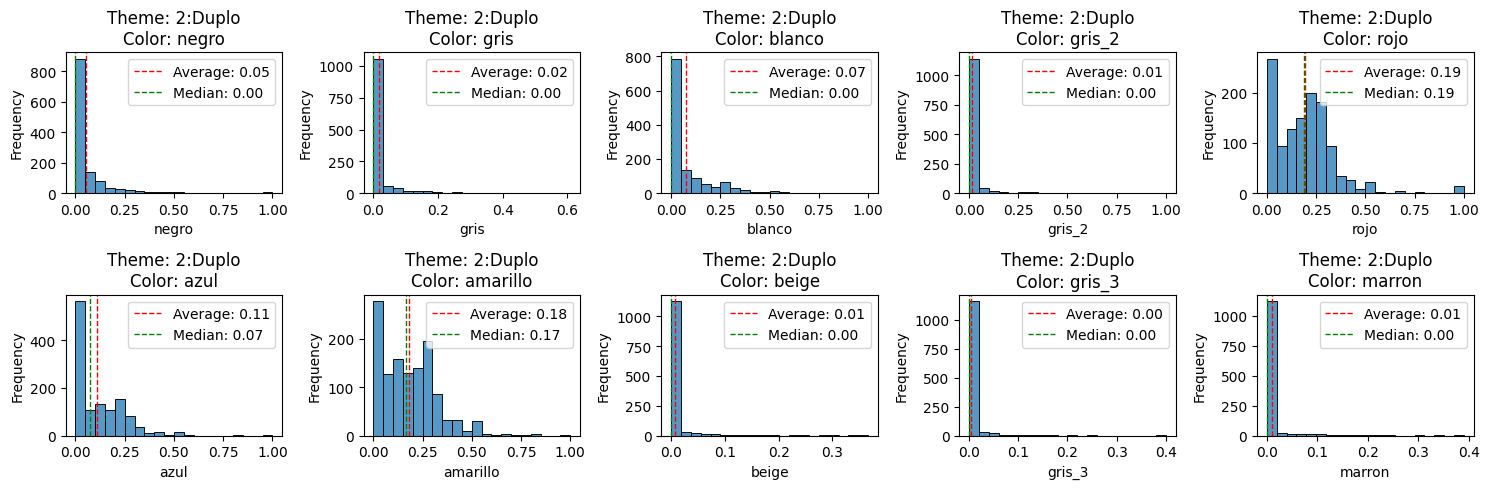

Descriptive Metrics for Theme 2:
             negro         gris       blanco       gris_2         rojo  \
count  1233.000000  1233.000000  1233.000000  1233.000000  1233.000000   
mean      0.052828     0.017037     0.073753     0.014312     0.192632   
std       0.111997     0.052822     0.125967     0.072828     0.163720   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.071429   
50%       0.000000     0.000000     0.000000     0.000000     0.190000   
75%       0.066667     0.000000     0.100000     0.000000     0.262712   
max       1.000000     0.608696     1.000000     1.000000     1.000000   

              azul     amarillo        beige       gris_3       marron  
count  1233.000000  1233.000000  1233.000000  1233.000000  1233.000000  
mean      0.111020     0.179298     0.007779     0.004849     0.010493  
std       0.126758     0.144618     0.033204     0.024310     0.041110  
min     

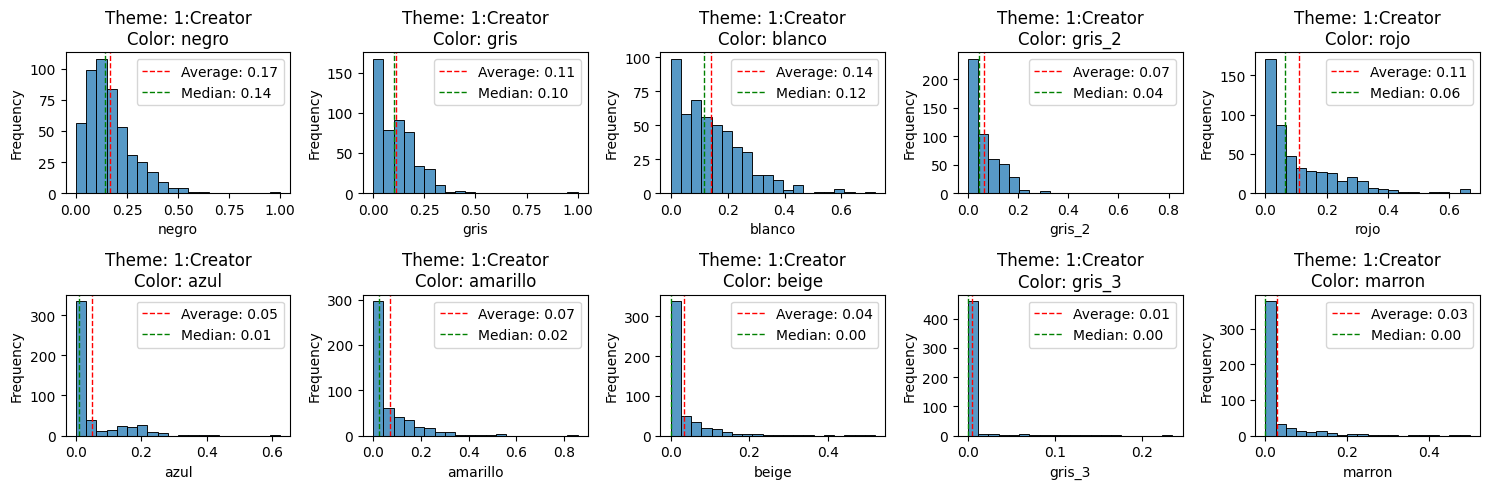

Descriptive Metrics for Theme 1:
            negro        gris      blanco      gris_2        rojo        azul  \
count  493.000000  493.000000  493.000000  493.000000  493.000000  493.000000   
mean     0.165918    0.110357    0.140711    0.065675    0.110185    0.050407   
std      0.116445    0.103029    0.119527    0.083217    0.123075    0.082275   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.088511    0.019206    0.051852    0.000000    0.021127    0.000000   
50%      0.141667    0.100000    0.117647    0.044218    0.062657    0.008929   
75%      0.219388    0.167291    0.202512    0.098765    0.176000    0.055276   
max      1.000000    1.000000    0.717949    0.815568    0.666667    0.625000   

         amarillo       beige      gris_3      marron  
count  493.000000  493.000000  493.000000  493.000000  
mean     0.069807    0.035041    0.005152    0.029066  
std      0.108357    0.070703    0.023284    0.068039  
min      0.00

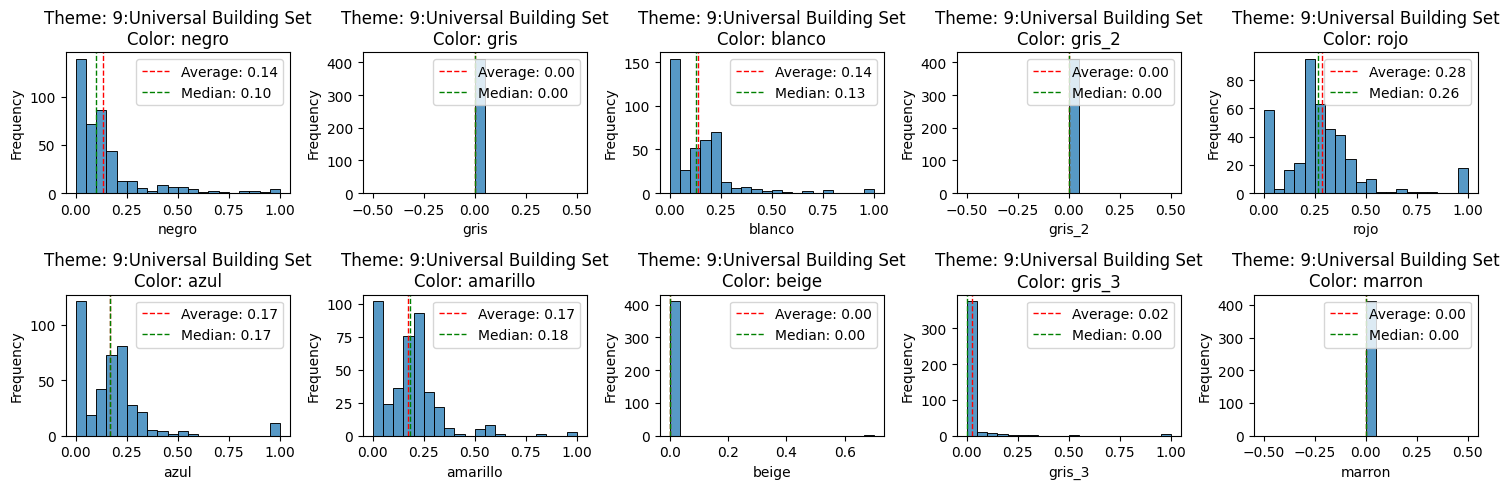

Descriptive Metrics for Theme 9:
            negro   gris      blanco  gris_2        rojo        azul  \
count  411.000000  411.0  411.000000   411.0  411.000000  411.000000   
mean     0.135349    0.0    0.139830     0.0    0.283485    0.169465   
std      0.176798    0.0    0.165924     0.0    0.210196    0.180977   
min      0.000000    0.0    0.000000     0.0    0.000000    0.000000   
25%      0.000000    0.0    0.000000     0.0    0.200000    0.000000   
50%      0.097674    0.0    0.130233     0.0    0.263027    0.168196   
75%      0.158387    0.0    0.203333     0.0    0.353207    0.223077   
max      1.000000    0.0    1.000000     0.0    1.000000    1.000000   

         amarillo       beige      gris_3  marron  
count  411.000000  411.000000  411.000000   411.0  
mean     0.171903    0.001703    0.023098     0.0  
std      0.148952    0.034528    0.108985     0.0  
min      0.000000    0.000000    0.000000     0.0  
25%      0.057743    0.000000    0.000000     0.0  
50%   

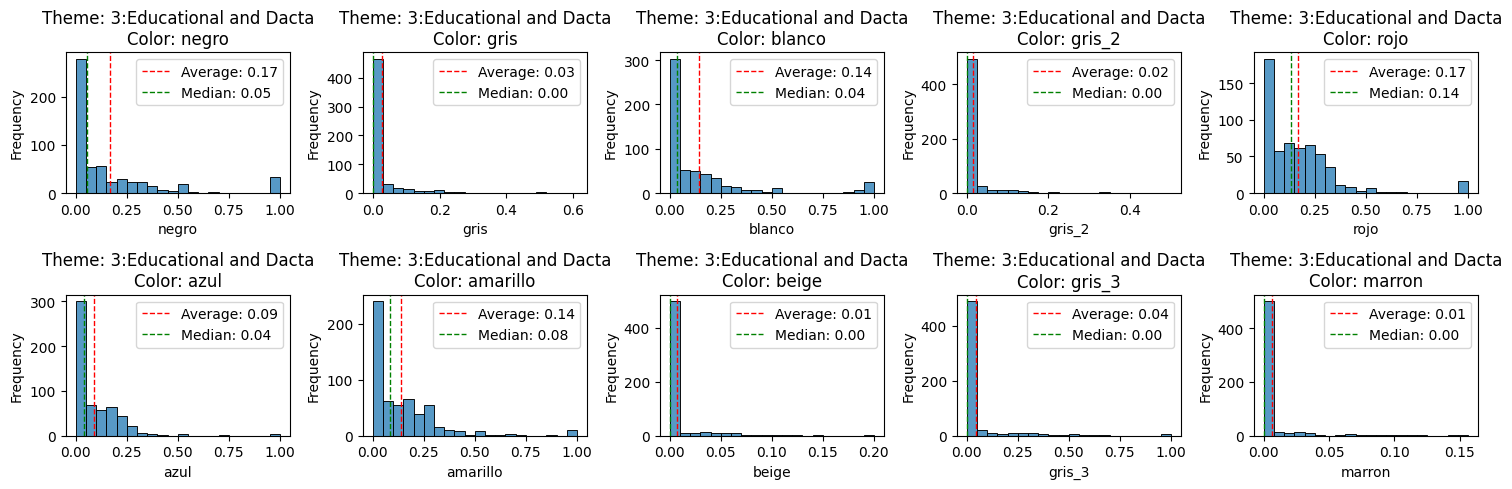

Descriptive Metrics for Theme 3:
            negro        gris      blanco      gris_2        rojo        azul  \
count  573.000000  573.000000  573.000000  573.000000  573.000000  573.000000   
mean     0.167153    0.028362    0.144751    0.015519    0.167460    0.087674   
std      0.257967    0.079003    0.245588    0.049755    0.192081    0.121557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.053759    0.000000    0.036017    0.000000    0.135135    0.039624   
75%      0.231481    0.005988    0.178733    0.000000    0.239734    0.152626   
max      1.000000    0.611111    1.000000    0.500000    1.000000    1.000000   

         amarillo       beige      gris_3      marron  
count  573.000000  573.000000  573.000000  573.000000  
mean     0.136687    0.007007    0.044362    0.005889  
std      0.177187    0.021534    0.139337    0.020549  
min      0.00

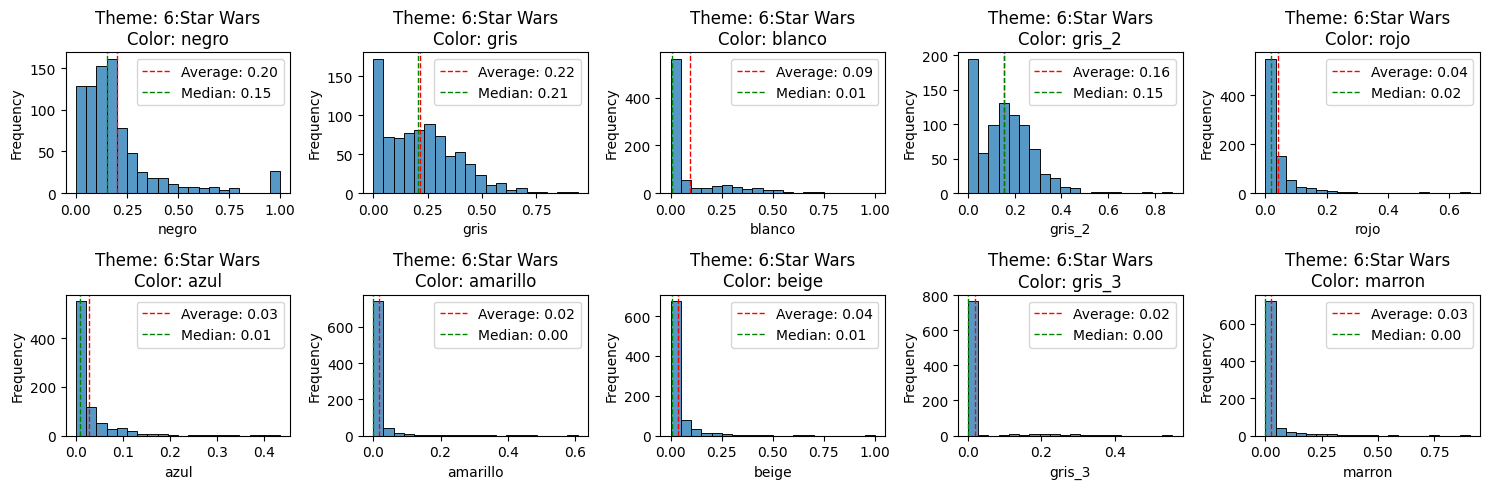

Descriptive Metrics for Theme 6:
            negro        gris      blanco      gris_2        rojo        azul  \
count  832.000000  832.000000  832.000000  832.000000  832.000000  832.000000   
mean     0.201262    0.216062    0.094052    0.155362    0.040375    0.028870   
std      0.205274    0.170611    0.161337    0.120571    0.075035    0.054104   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.083333    0.071271    0.000000    0.056800    0.000000    0.000000   
50%      0.152358    0.206143    0.007890    0.154366    0.018519    0.008214   
75%      0.227014    0.322881    0.118416    0.229514    0.045641    0.035359   
max      1.000000    0.941176    1.000000    0.875000    0.666667    0.433735   

         amarillo       beige      gris_3      marron  
count  832.000000  832.000000  832.000000  832.000000  
mean     0.015693    0.036604    0.019611    0.026152  
std      0.051215    0.082105    0.073201    0.078465  
min      0.00

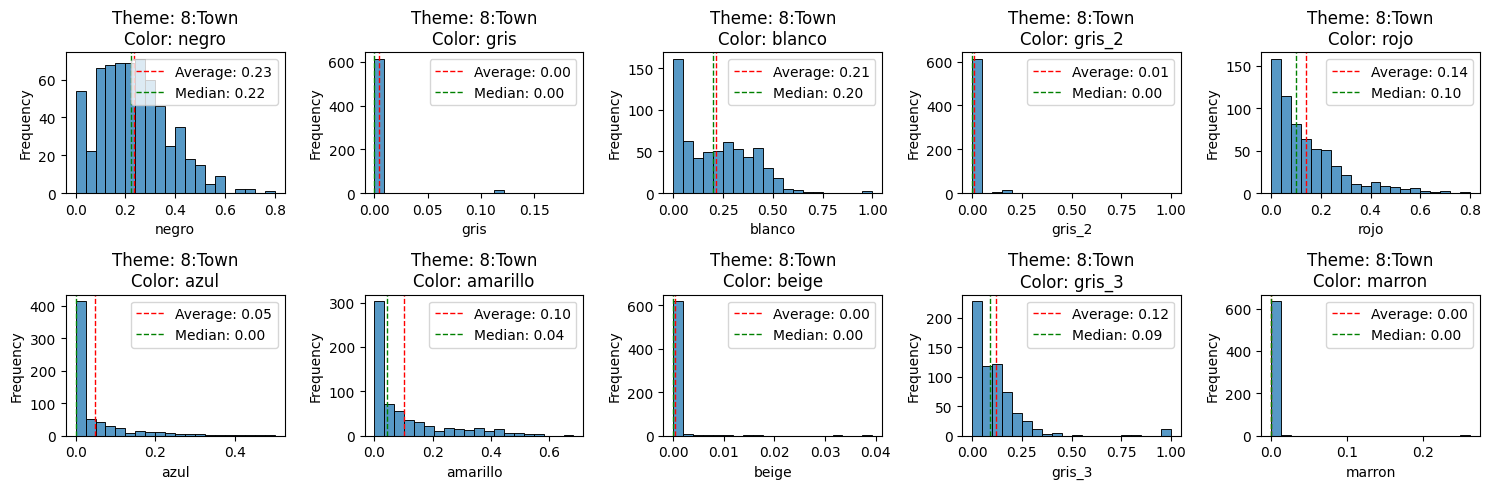

Descriptive Metrics for Theme 8:
            negro        gris      blanco      gris_2        rojo        azul  \
count  637.000000  637.000000  637.000000  637.000000  637.000000  637.000000   
mean     0.233124    0.004653    0.212622    0.008999    0.140602    0.048041   
std      0.141292    0.024546    0.174696    0.066037    0.138937    0.088641   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.129032    0.000000    0.048780    0.000000    0.040000    0.000000   
50%      0.222222    0.000000    0.200450    0.000000    0.100917    0.000000   
75%      0.318182    0.000000    0.350000    0.000000    0.202247    0.059459   
max      0.800000    0.186984    1.000000    1.000000    0.800000    0.500000   

         amarillo       beige      gris_3      marron  
count  637.000000  637.000000  637.000000  637.000000  
mean     0.103101    0.000324    0.117678    0.000506  
std      0.139723    0.002474    0.156231    0.010450  
min      0.00

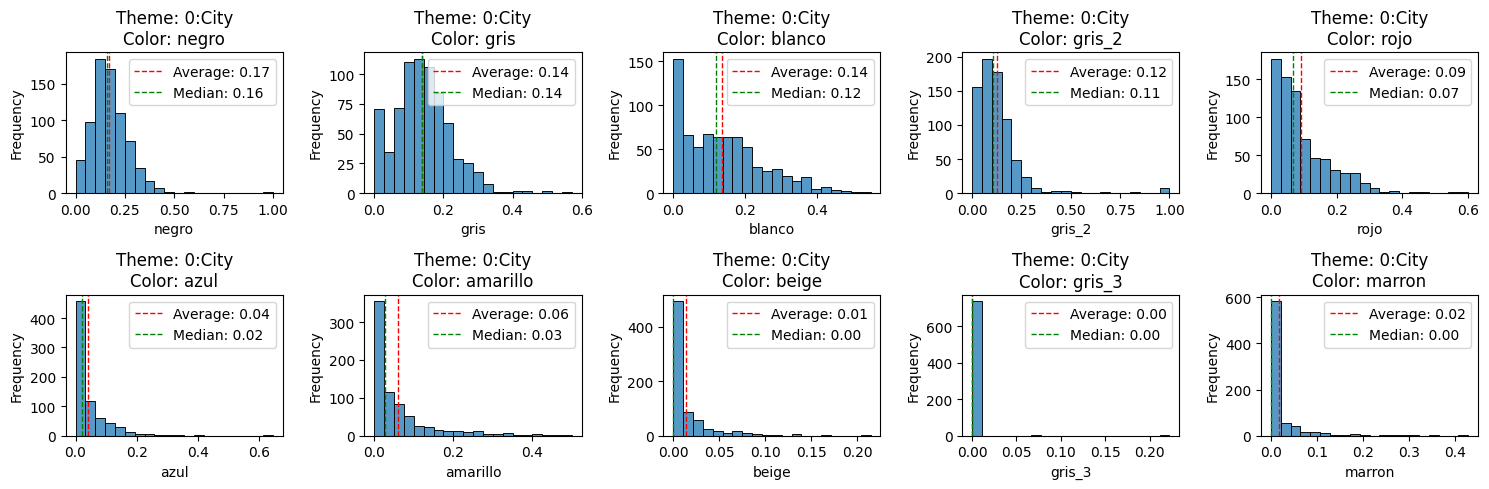

Descriptive Metrics for Theme 0:
            negro        gris      blanco      gris_2        rojo        azul  \
count  739.000000  739.000000  739.000000  739.000000  739.000000  739.000000   
mean     0.171686    0.139324    0.137148    0.124342    0.091222    0.041251   
std      0.094006    0.082279    0.113345    0.127734    0.085293    0.059408   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.111504    0.087528    0.040882    0.057433    0.031472    0.000000   
50%      0.157895    0.137324    0.118557    0.105263    0.066667    0.020772   
75%      0.221676    0.186220    0.202298    0.157838    0.129582    0.056506   
max      1.000000    0.571429    0.550000    1.000000    0.600000    0.645161   

         amarillo       beige      gris_3      marron  
count  739.000000  739.000000  739.000000  739.000000  
mean     0.059053    0.013673    0.000397    0.018454  
std      0.084153    0.025373    0.008583    0.043018  
min      0.00

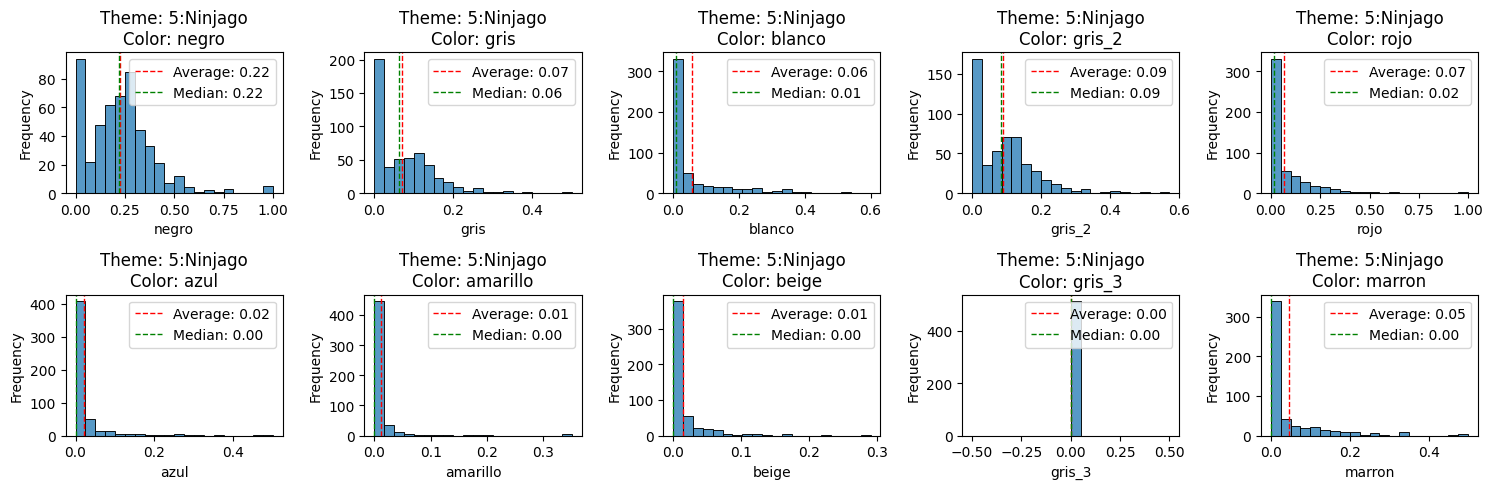

Descriptive Metrics for Theme 5:
            negro        gris      blanco      gris_2        rojo        azul  \
count  512.000000  512.000000  512.000000  512.000000  512.000000  512.000000   
mean     0.223361    0.071090    0.057331    0.090434    0.067992    0.022056   
std      0.168353    0.076708    0.101612    0.088271    0.117054    0.055652   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.120515    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.218316    0.061411    0.007674    0.085212    0.016310    0.000000   
75%      0.303488    0.116694    0.064153    0.135213    0.096641    0.018191   
max      1.000000    0.500000    0.600000    0.571429    1.000000    0.500000   

         amarillo       beige  gris_3      marron  
count  512.000000  512.000000   512.0  512.000000  
mean     0.010980    0.014591     0.0    0.045545  
std      0.042768    0.031557     0.0    0.085258  
min      0.000000    0.000000

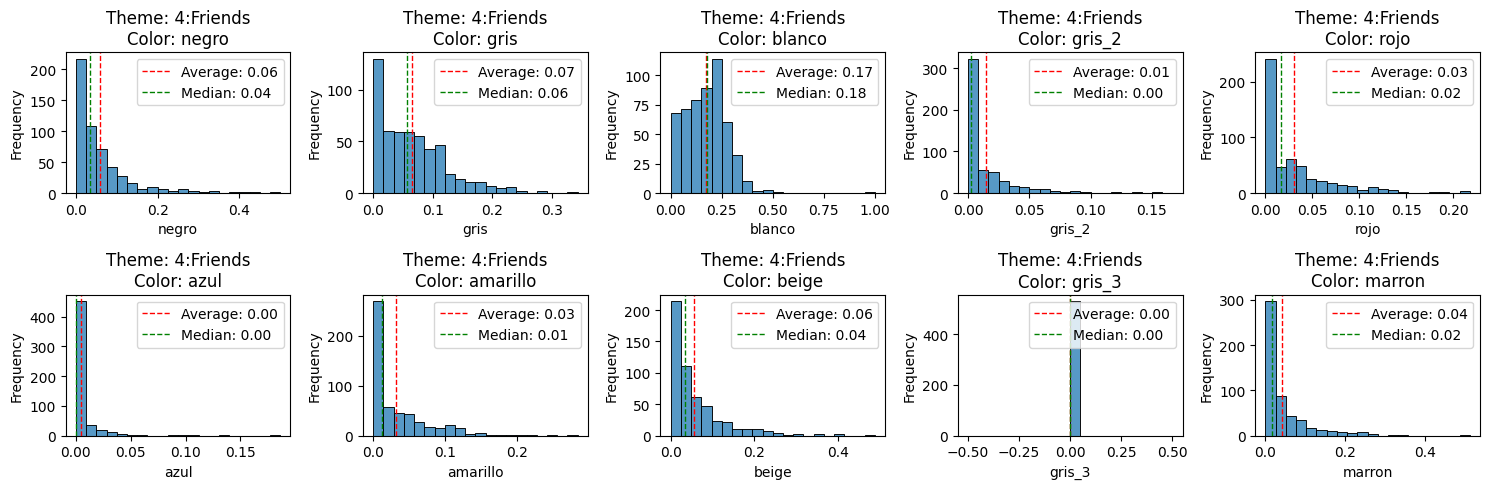

Descriptive Metrics for Theme 4:
            negro        gris      blanco      gris_2        rojo        azul  \
count  530.000000  530.000000  530.000000  530.000000  530.000000  530.000000   
mean     0.058125    0.065231    0.173232    0.014630    0.030203    0.004790   
std      0.073821    0.058608    0.104662    0.026093    0.039689    0.015099   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.008305    0.017959    0.096515    0.000000    0.000000    0.000000   
50%      0.035526    0.056435    0.178327    0.002118    0.016162    0.000000   
75%      0.075391    0.099433    0.238161    0.019589    0.042938    0.001799   
max      0.500000    0.343750    1.000000    0.166667    0.217391    0.186364   

         amarillo       beige  gris_3      marron  
count  530.000000  530.000000   530.0  530.000000  
mean     0.032208    0.056084     0.0    0.042054  
std      0.043753    0.068819     0.0    0.062741  
min      0.000000    0.000000

In [9]:
# Colores
colores = ['negro', 'gris', 'blanco', 'gris_2', 'rojo', 'azul', 'amarillo', 'beige', 'gris_3', 'marron']
themes = data['themes'].unique()

for theme in themes:
    theme_data = data[data['themes'] == theme]
    subset_data = theme_data[colores]
    metrics = subset_data.describe()
    
    plt.figure(figsize=(15, 5))
    for i, color in enumerate(colores):
        plt.subplot(2, 5, i+1)
        sns.histplot(data=subset_data, x=color, bins=20)
        plt.title(f"Theme: {theme}:{clases_list[theme]}\nColor: {color}")
        plt.xlabel(color)
        plt.ylabel("Frequency")
        
        average = metrics.loc['mean', color]
        median = metrics.loc['50%', color]
        plt.axvline(average, color='r', linestyle='--', linewidth=1, label=f"Average: {average:.2f}")
        plt.axvline(median, color='g', linestyle='--', linewidth=1, label=f"Median: {median:.2f}")
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Descriptive Metrics for Theme {theme}:")
    print(metrics)
    print()

##  Verificamos si algún material solo está presente en una clase

[inicio](#Tabla-de-contenido)

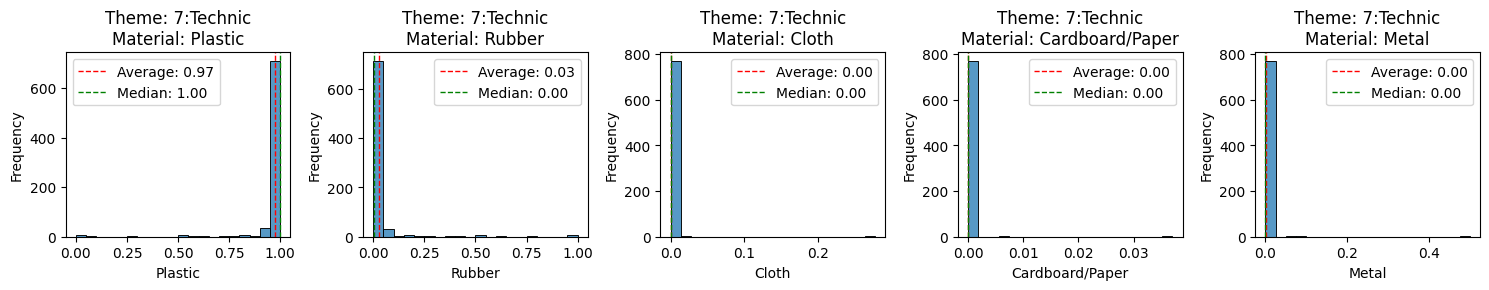

Descriptive Metrics for Theme 7:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  772.000000  772.000000  772.000000       772.000000  772.000000
mean     0.972463    0.025955    0.000640         0.000068    0.000874
std      0.105966    0.101847    0.010083         0.001379    0.018381
min      0.000000    0.000000    0.000000         0.000000    0.000000
25%      0.984041    0.000000    0.000000         0.000000    0.000000
50%      0.996338    0.003216    0.000000         0.000000    0.000000
75%      1.000000    0.015531    0.000000         0.000000    0.000000
max      1.000000    1.000000    0.277778         0.037037    0.500000



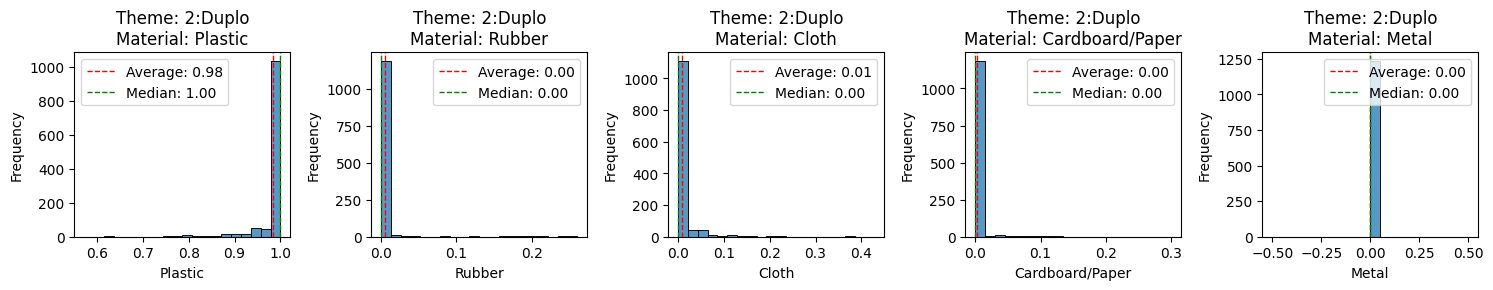

Descriptive Metrics for Theme 2:
           Plastic       Rubber        Cloth  Cardboard/Paper   Metal
count  1233.000000  1233.000000  1233.000000      1233.000000  1233.0
mean      0.984580     0.004630     0.007620         0.003170     0.0
std       0.045919     0.029087     0.031008         0.018873     0.0
min       0.571429     0.000000     0.000000         0.000000     0.0
25%       1.000000     0.000000     0.000000         0.000000     0.0
50%       1.000000     0.000000     0.000000         0.000000     0.0
75%       1.000000     0.000000     0.000000         0.000000     0.0
max       1.000000     0.260870     0.428571         0.300000     0.0



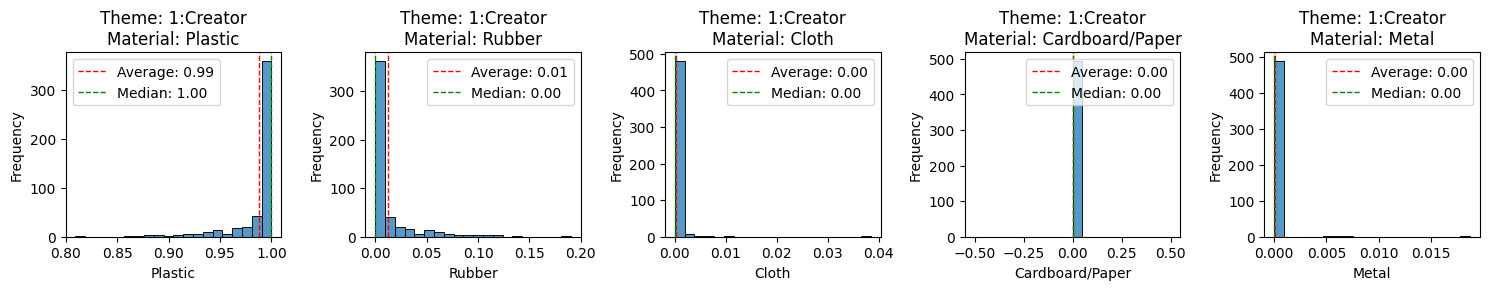

Descriptive Metrics for Theme 1:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  493.000000  493.000000  493.000000            493.0  493.000000
mean     0.987630    0.012074    0.000208              0.0    0.000089
std      0.025640    0.025638    0.001877              0.0    0.001014
min      0.809524    0.000000    0.000000              0.0    0.000000
25%      0.988395    0.000000    0.000000              0.0    0.000000
50%      1.000000    0.000000    0.000000              0.0    0.000000
75%      1.000000    0.010782    0.000000              0.0    0.000000
max      1.000000    0.190476    0.038462              0.0    0.018789



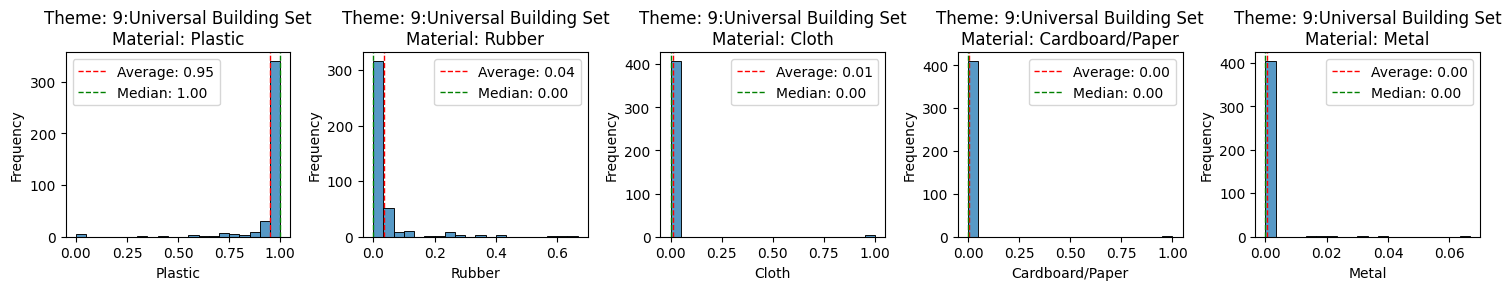

Descriptive Metrics for Theme 9:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  411.000000  411.000000  411.000000       411.000000  411.000000
mean     0.952049    0.035056    0.009942         0.002433    0.000519
std      0.134949    0.083810    0.098276         0.049326    0.004487
min      0.000000    0.000000    0.000000         0.000000    0.000000
25%      0.966527    0.000000    0.000000         0.000000    0.000000
50%      1.000000    0.000000    0.000000         0.000000    0.000000
75%      1.000000    0.031008    0.000000         0.000000    0.000000
max      1.000000    0.666667    1.000000         1.000000    0.066667



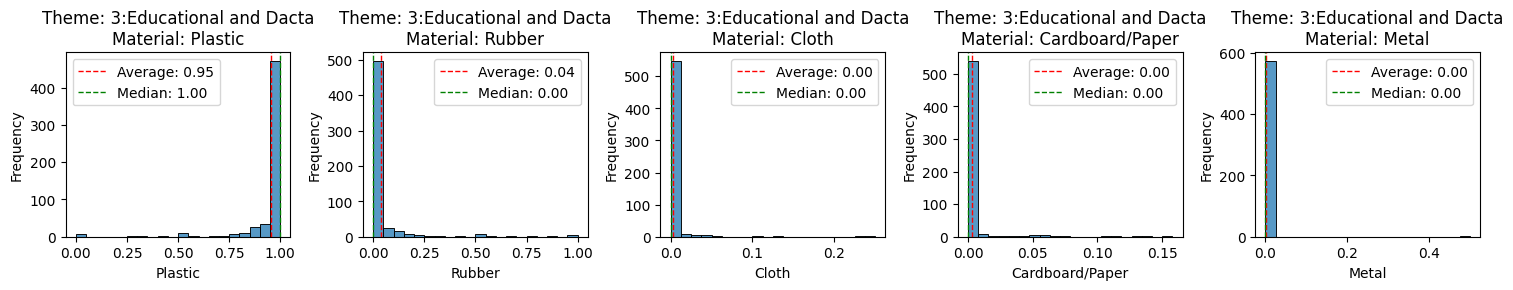

Descriptive Metrics for Theme 3:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  573.000000  573.000000  573.000000       573.000000  573.000000
mean     0.954058    0.038805    0.002877         0.003331    0.000929
std      0.135871    0.132093    0.019894         0.015974    0.020904
min      0.000000    0.000000    0.000000         0.000000    0.000000
25%      0.972906    0.000000    0.000000         0.000000    0.000000
50%      1.000000    0.000000    0.000000         0.000000    0.000000
75%      1.000000    0.011032    0.000000         0.000000    0.000000
max      1.000000    1.000000    0.250000         0.157895    0.500000



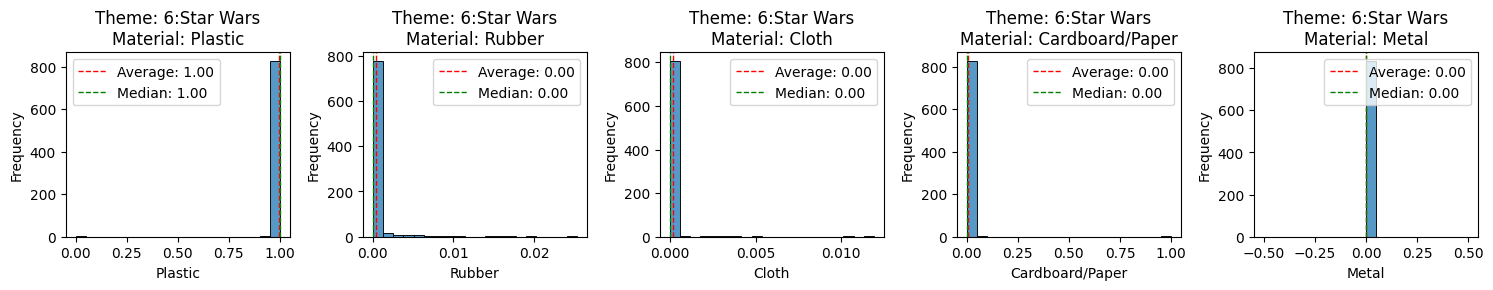

Descriptive Metrics for Theme 6:
          Plastic      Rubber       Cloth  Cardboard/Paper  Metal
count  832.000000  832.000000  832.000000       832.000000  832.0
mean     0.996064    0.000444    0.000189         0.003303    0.0
std      0.052091    0.002186    0.001270         0.052071    0.0
min      0.000000    0.000000    0.000000         0.000000    0.0
25%      1.000000    0.000000    0.000000         0.000000    0.0
50%      1.000000    0.000000    0.000000         0.000000    0.0
75%      1.000000    0.000000    0.000000         0.000000    0.0
max      1.000000    0.025316    0.011905         1.000000    0.0



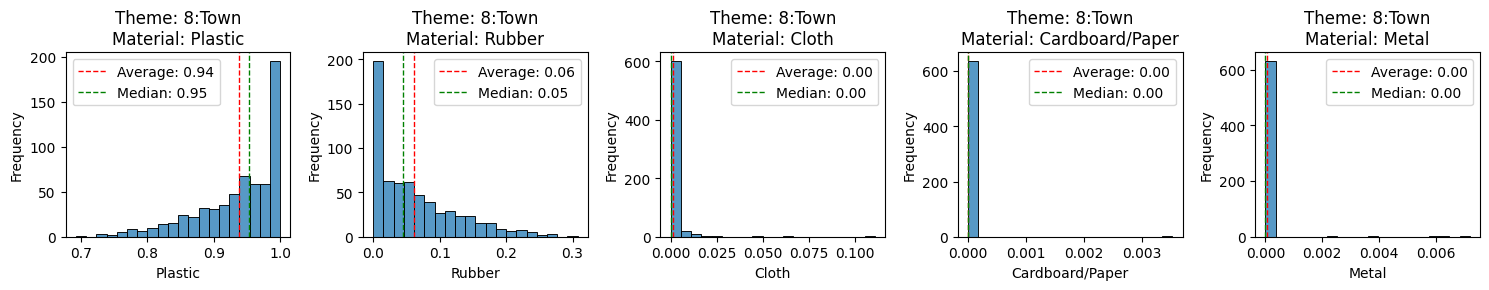

Descriptive Metrics for Theme 8:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  637.000000  637.000000  637.000000       637.000000  637.000000
mean     0.937472    0.061407    0.001070         0.000006    0.000046
std      0.063564    0.063541    0.006059         0.000140    0.000498
min      0.692308    0.000000    0.000000         0.000000    0.000000
25%      0.900000    0.000000    0.000000         0.000000    0.000000
50%      0.952381    0.045455    0.000000         0.000000    0.000000
75%      1.000000    0.096774    0.000000         0.000000    0.000000
max      1.000000    0.307692    0.111111         0.003521    0.007194



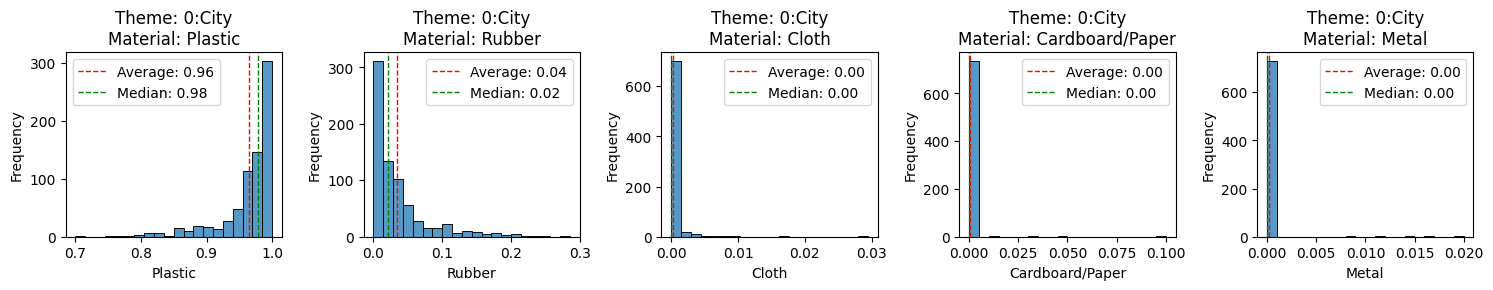

Descriptive Metrics for Theme 0:
          Plastic      Rubber       Cloth  Cardboard/Paper       Metal
count  739.000000  739.000000  739.000000       739.000000  739.000000
mean     0.964271    0.035011    0.000282         0.000262    0.000173
std      0.046675    0.046286    0.001574         0.004284    0.001531
min      0.700000    0.000000    0.000000         0.000000    0.000000
25%      0.956522    0.000000    0.000000         0.000000    0.000000
50%      0.978365    0.020725    0.000000         0.000000    0.000000
75%      1.000000    0.043478    0.000000         0.000000    0.000000
max      1.000000    0.285714    0.029412         0.100000    0.019960



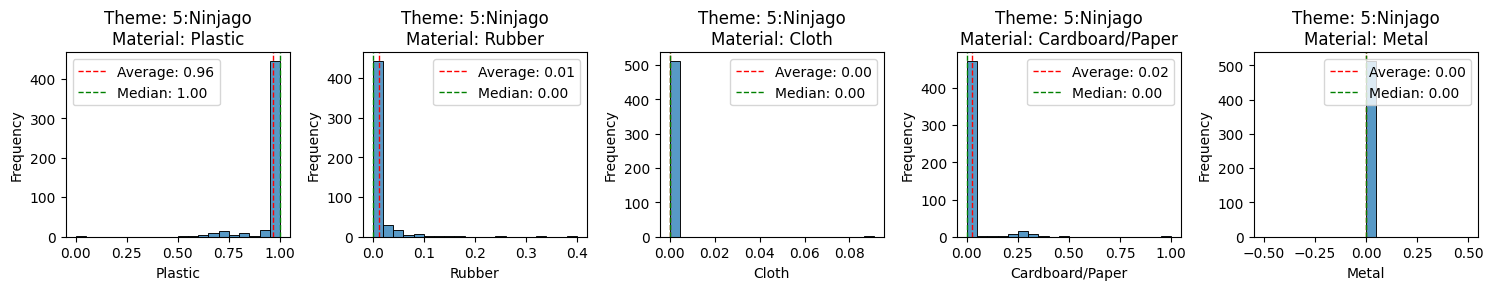

Descriptive Metrics for Theme 5:
          Plastic      Rubber       Cloth  Cardboard/Paper  Metal
count  512.000000  512.000000  512.000000        512.00000  512.0
mean     0.963749    0.011882    0.000219          0.02415    0.0
std      0.102209    0.037705    0.004029          0.09478    0.0
min      0.000000    0.000000    0.000000          0.00000    0.0
25%      0.984873    0.000000    0.000000          0.00000    0.0
50%      1.000000    0.000000    0.000000          0.00000    0.0
75%      1.000000    0.006584    0.000000          0.00000    0.0
max      1.000000    0.400000    0.090909          1.00000    0.0



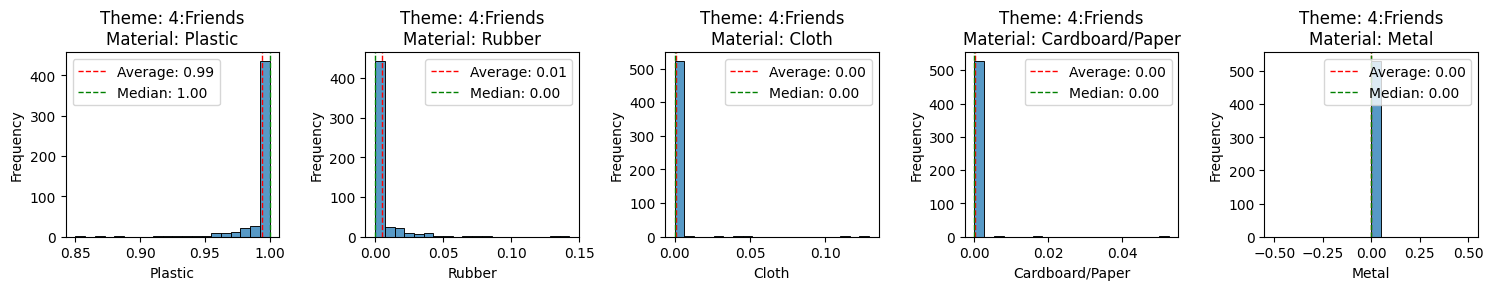

Descriptive Metrics for Theme 4:
          Plastic      Rubber       Cloth  Cardboard/Paper  Metal
count  530.000000  530.000000  530.000000       530.000000  530.0
mean     0.993858    0.005065    0.000934         0.000143    0.0
std      0.017276    0.014897    0.008547         0.002413    0.0
min      0.850000    0.000000    0.000000         0.000000    0.0
25%      0.997905    0.000000    0.000000         0.000000    0.0
50%      1.000000    0.000000    0.000000         0.000000    0.0
75%      1.000000    0.000000    0.000000         0.000000    0.0
max      1.000000    0.142857    0.129032         0.052632    0.0



In [10]:
# Materiales
materiales = ['Plastic', 'Rubber', 'Cloth', 'Cardboard/Paper', 'Metal']
themes = data['themes'].unique()

for theme in themes:
    theme_data = data[data['themes'] == theme]
    subset_data = theme_data[materiales]
    metrics = subset_data.describe()
    
    plt.figure(figsize=(15, 5))
    for i, material in enumerate(materiales):
        plt.subplot(2, 5, i+1)
        sns.histplot(data=subset_data, x=material, bins=20)
        plt.title(f"Theme: {theme}:{clases_list[theme]}\nMaterial: {material}")
        plt.xlabel(material)
        plt.ylabel("Frequency")
        
        average = metrics.loc['mean', material]
        median = metrics.loc['50%', material]
        plt.axvline(average, color='r', linestyle='--', linewidth=1, label=f"Average: {average:.2f}")
        plt.axvline(median, color='g', linestyle='--', linewidth=1, label=f"Median: {median:.2f}")
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Descriptive Metrics for Theme {theme}:")
    print(metrics)
    print()

### Verificar el balance de clases
[inicio](#Tabla-de-contenido)

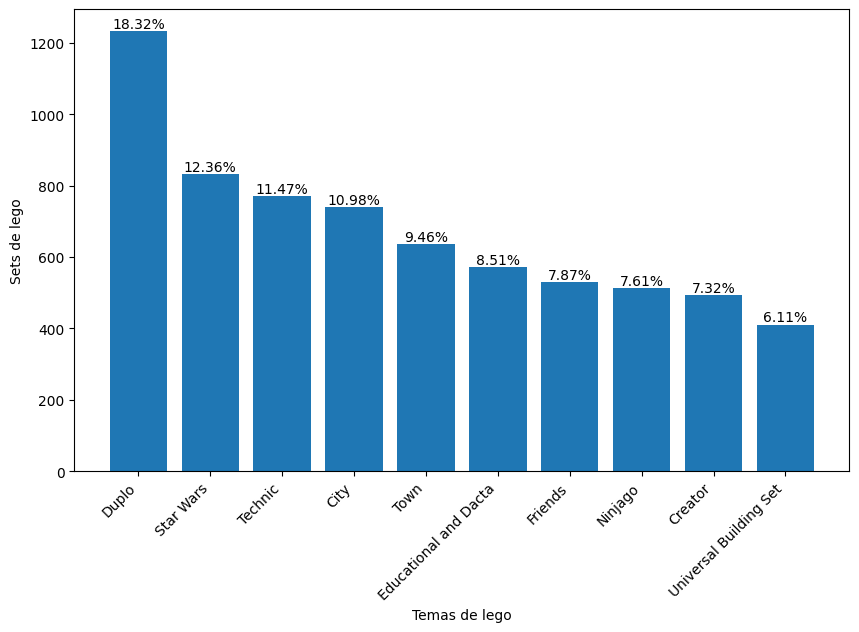

In [11]:
# Calcular counts y porcentajes
valid_categories = data["themes"]
category_counts = valid_categories.value_counts()
total_count = len(valid_categories)
category_percentages = (category_counts / total_count) * 100

# Grafico
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index.map(inv_clases), category_counts)
plt.xlabel("Temas de lego")
plt.ylabel("Sets de lego")

# Agregar porcentajes sobre las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    category = category_counts.index[i]
    if category in category_percentages:
        percentage = category_percentages[category]
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.2f}%", ha="center", va="bottom")

plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
#Calculamos el balance de pesos de clases

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.9220890410958904,
 1: 1.3772378516624042,
 2: 0.5523076923076923,
 3: 1.1360759493670887,
 4: 1.2552447552447552,
 5: 1.3395522388059702,
 6: 0.7907488986784141,
 7: 0.869951534733441,
 8: 1.0558823529411765,
 9: 1.6828125}

### Creamos la función 'evaluar' 

Para avaluar la performace de los diferentes modelos de la misma manera

[inicio](#Tabla-de-contenido)

In [12]:
def evaluar(y_test, y_train, y_pred, y_pred_is):

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('F1:', f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test,y_pred, target_names=clases_list))

    
    cm = confusion_matrix(y_train, y_pred_is)
    sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g', xticklabels=clases_list, yticklabels=clases_list)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de confusion - train data')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g', xticklabels=clases_list, yticklabels=clases_list)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de confusion - test data')
    plt.show()

In [13]:
# Se seleccionaron 12 features basandonos en top 20 por MI y luego eliminando features correlacionadas entre si (Spearman)
features = ['Plates Special', 'Bricks', 'Duplo, Quatro and Primo', 'Minifig Accessories', 'gris', 'Bricks Sloped', 'negro',
            'Transportation - Land', 'Technic Pins', 'rojo', 'amarillo', 'Bars, Ladders and Fences']

In [14]:
data = pd.read_csv("./data/df_encoded.csv")
data.rename(columns={'0': 'themes'}, inplace=True)
cols = data.columns.tolist()
cols = [cols[-1]] + cols[:-1]
data = data[cols]

In [15]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data[features]
y = data['themes']

## Separamos el dataset 

- Entrenamiento 80% 
- Test 20%

[inicio](#Tabla-de-contenido)

In [16]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegressionCV

[inicio](#Tabla-de-contenido)

c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\pycaret\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\pycaret\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

Accuracy: 0.7015590200445434
Precision: 0.6793376238638198
Recall: 0.7015590200445434
F1: 0.6852758679734551
                        precision    recall  f1-score   support

                  City       0.81      0.70      0.75       155
               Creator       0.50      0.58      0.54       102
                 Duplo       0.86      0.94      0.90       258
 Educational and Dacta       0.12      0.05      0.07        99
               Friends       0.63      0.72      0.68       101
               Ninjago       0.65      0.55      0.59       110
             Star Wars       0.67      0.59      0.63       151
               Technic       0.68      0.89      0.77       153
                  Town       0.81      0.76      0.78       127
Universal Building Set       0.68      0.84      0.75        91

              accuracy                           0.70      1347
             macro avg       0.64      0.66      0.65      1347
          weighted avg       0.68      0.70      0.69    

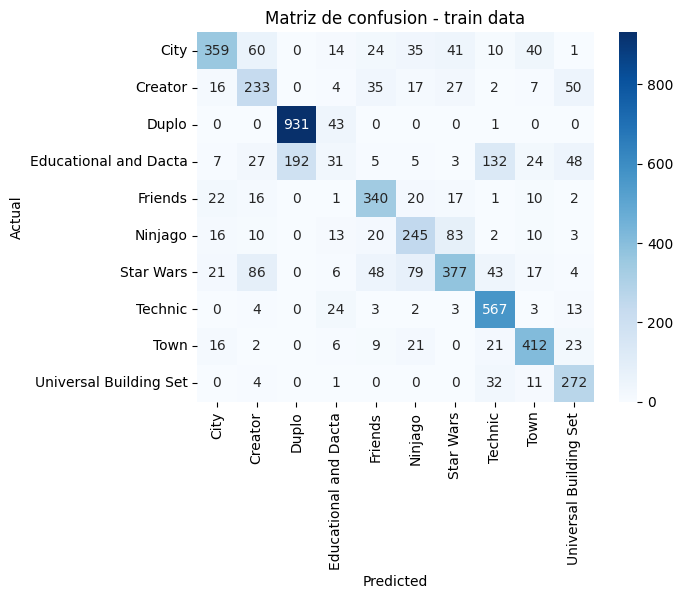

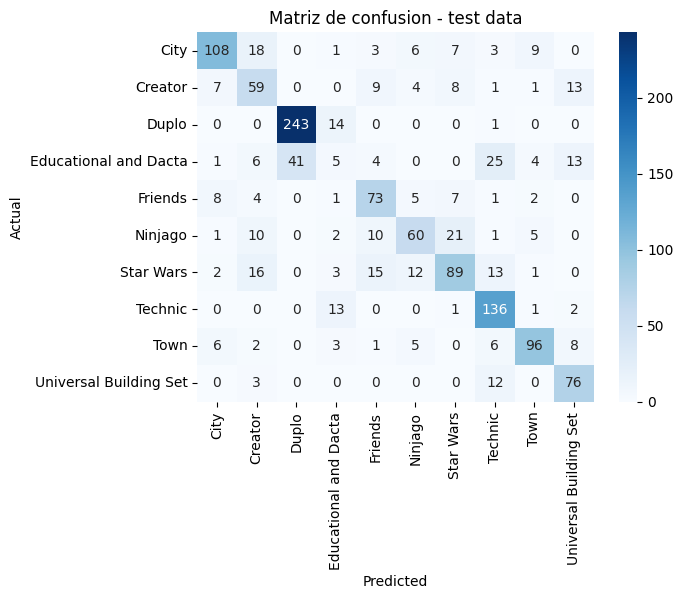

In [17]:
# Pruebo un log reg balanceado
lr_model = LogisticRegressionCV(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_is = lr_model.predict(X_train)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

# XGB Classifier

[inicio](#Tabla-de-contenido)

Accuracy: 0.7743132887899035
Precision: 0.7601333323314983
Recall: 0.7743132887899035
F1: 0.7610314139450599
                        precision    recall  f1-score   support

                  City       0.77      0.79      0.78       155
               Creator       0.66      0.62      0.64       102
                 Duplo       0.87      0.96      0.91       258
 Educational and Dacta       0.48      0.20      0.28        99
               Friends       0.76      0.69      0.73       101
               Ninjago       0.75      0.69      0.72       110
             Star Wars       0.68      0.74      0.71       151
               Technic       0.77      0.96      0.85       153
                  Town       0.86      0.84      0.85       127
Universal Building Set       0.85      0.86      0.85        91

              accuracy                           0.77      1347
             macro avg       0.74      0.74      0.73      1347
          weighted avg       0.76      0.77      0.76    

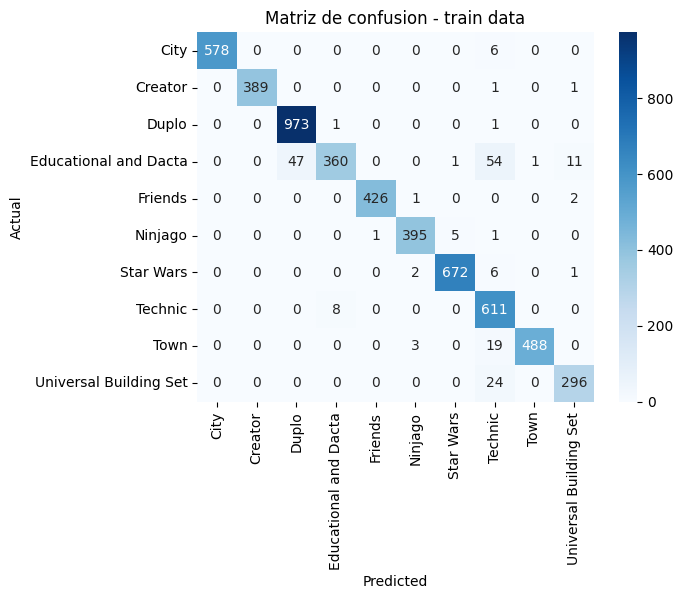

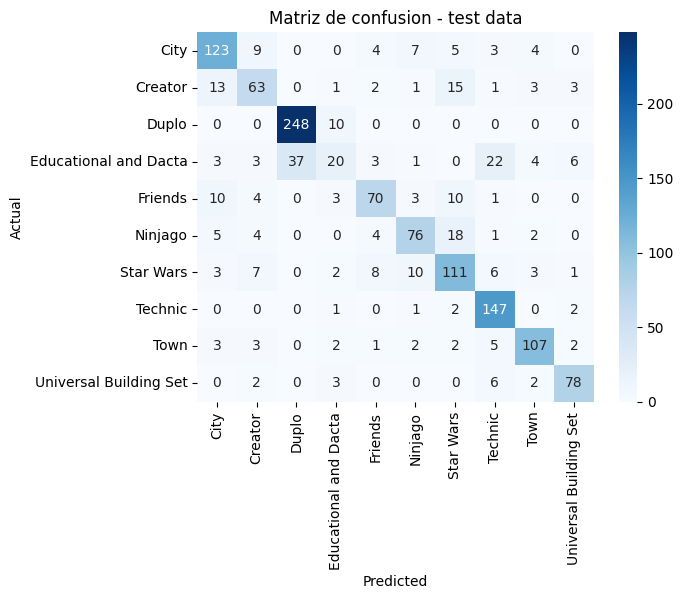

In [18]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_is = model.predict(X_train)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

## Random Oversampling

In [202]:
ros_method = RandomOverSampler(sampling_strategy="minority")
X_resampled, y_resampled = ros_method.fit_resample(X_train, y_train)

# Logistic Regression with ROS

[inicio](#Tabla-de-contenido)

In [207]:
lregression_ros = LogisticRegression(max_iter=10000)
lregression_ros.fit(X_resampled, y_resampled)
y_ros_pred = lregression_ros.predict(X_test)
y_ros_pred_is = lregression_ros.predict(X_resampled)

Accuracy: 0.6340014847809948
Precision: 0.6182393928574209
Recall: 0.6340014847809948
F1: 0.5988004498711865
                        precision    recall  f1-score   support

                  City       0.72      0.61      0.66       155
               Creator       0.69      0.20      0.31       102
                 Duplo       0.86      0.97      0.91       258
 Educational and Dacta       0.00      0.00      0.00        99
               Friends       0.43      0.71      0.54       101
               Ninjago       0.74      0.29      0.42       110
             Star Wars       0.44      0.68      0.53       151
               Technic       0.69      0.75      0.71       153
                  Town       0.64      0.72      0.68       127
Universal Building Set       0.56      0.85      0.68        91

              accuracy                           0.63      1347
             macro avg       0.58      0.58      0.54      1347
          weighted avg       0.62      0.63      0.60    

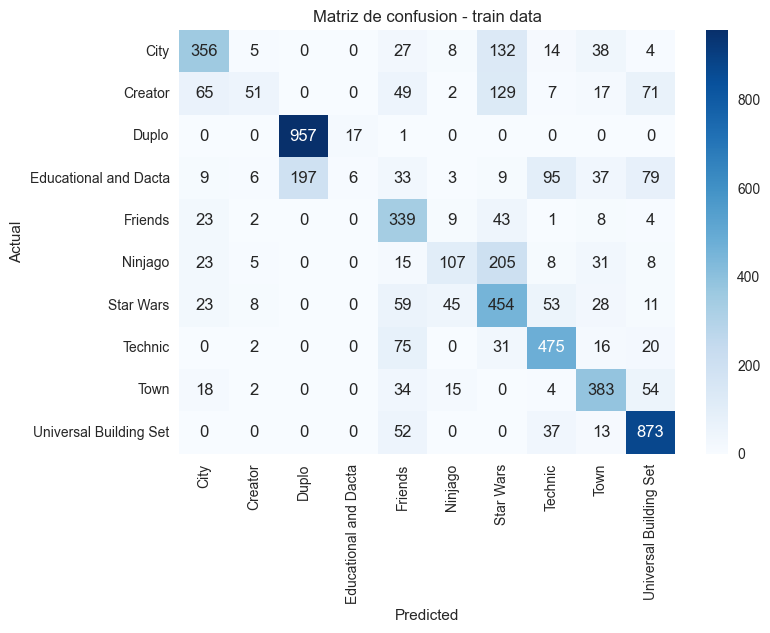

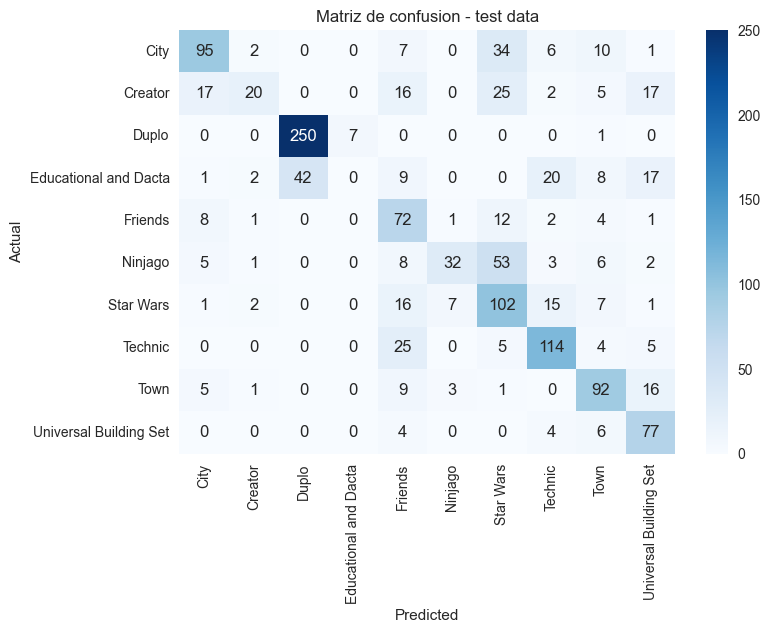

In [208]:
evaluar(y_test, y_resampled, y_ros_pred, y_ros_pred_is)

# SMOTE

[inicio](#Tabla-de-contenido)

Accuracy: 0.7000742390497402
Precision: 0.6799613658291798
Recall: 0.7000742390497402
F1: 0.6854585545757078
                        precision    recall  f1-score   support

                  City       0.82      0.70      0.76       155
               Creator       0.49      0.58      0.53       102
                 Duplo       0.85      0.93      0.89       258
 Educational and Dacta       0.13      0.06      0.08        99
               Friends       0.69      0.70      0.70       101
               Ninjago       0.65      0.56      0.60       110
             Star Wars       0.65      0.58      0.61       151
               Technic       0.68      0.88      0.77       153
                  Town       0.78      0.76      0.77       127
Universal Building Set       0.68      0.84      0.75        91

              accuracy                           0.70      1347
             macro avg       0.64      0.66      0.65      1347
          weighted avg       0.68      0.70      0.69    

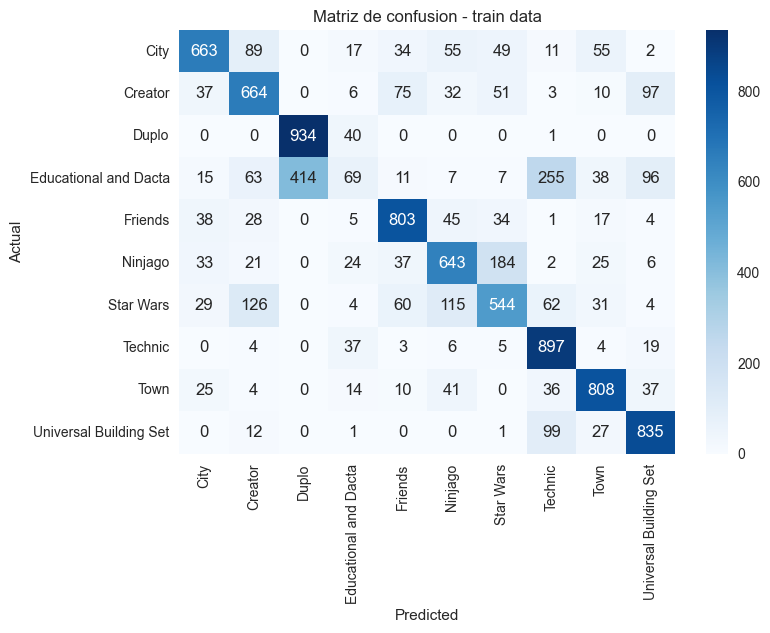

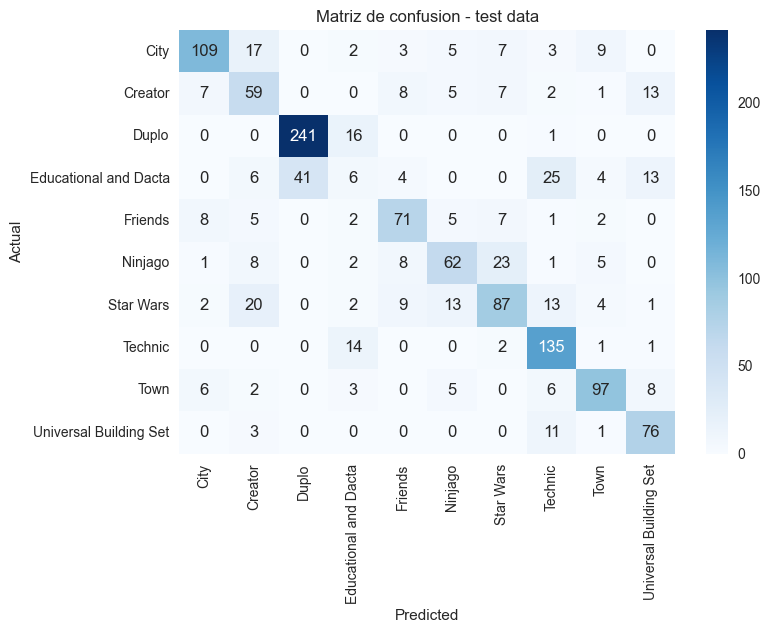

In [209]:

smote_method = SMOTE(random_state = 42)
#Apply resampling to the data training only
X_resampled_smote, y_resampled_smote = smote_method.fit_resample(X_train, y_train)
lregression_smote = LogisticRegressionCV(random_state=42, max_iter=10000)
lregression_smote.fit(X_resampled_smote, y_resampled_smote)
y_smote_pred = lregression_smote.predict(X_test)
y_smote_pred_is = lregression_smote.predict(X_resampled_smote)

evaluar(y_test, y_resampled_smote, y_smote_pred, y_smote_pred_is)

# CatBoostClassifier

[inicio](#Tabla-de-contenido)

Accuracy: 0.7861915367483296
Precision: 0.7744188591264001
Recall: 0.7861915367483296
F1: 0.776474104867037
                        precision    recall  f1-score   support

                  City       0.79      0.79      0.79       155
               Creator       0.69      0.67      0.68       102
                 Duplo       0.88      0.94      0.91       258
 Educational and Dacta       0.49      0.26      0.34        99
               Friends       0.78      0.79      0.78       101
               Ninjago       0.74      0.73      0.73       110
             Star Wars       0.73      0.72      0.72       151
               Technic       0.79      0.97      0.87       153
                  Town       0.85      0.83      0.84       127
Universal Building Set       0.83      0.87      0.85        91

              accuracy                           0.79      1347
             macro avg       0.76      0.76      0.75      1347
          weighted avg       0.77      0.79      0.78     

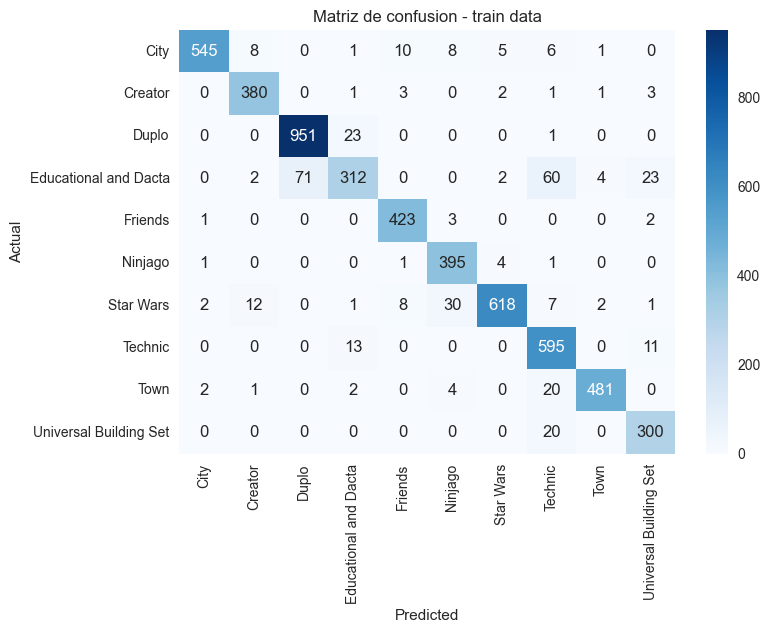

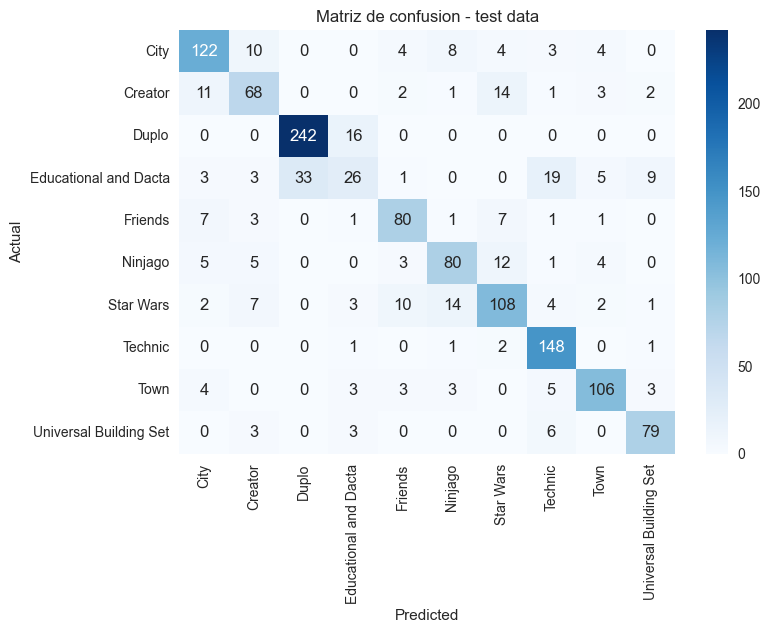

In [33]:
CatBoostC = CatBoostClassifier(border_count= 32, verbose= False, task_type= 'GPU', random_state= 42, class_weights=class_weights)
CatBoostC.fit(X_train, y_train)
y_pred = CatBoostC.predict(X_test)
y_pred_is = CatBoostC.predict(X_train)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

# RandomForestClassifier

[inicio](#Tabla-de-contenido)

In [26]:
clrfc = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced' , random_state=42)
clrfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

In [27]:
y_rfc_pred = clrfc.predict(X_test)
y_rfc_pred_is = clrfc.predict(X_train)

Accuracy: 0.7802524127691166
Precision: 0.7663227706335335
Recall: 0.7802524127691166
F1: 0.7648774762138383
                        precision    recall  f1-score   support

                  City       0.77      0.82      0.80       155
               Creator       0.76      0.58      0.66       102
                 Duplo       0.87      0.97      0.92       258
 Educational and Dacta       0.50      0.19      0.28        99
               Friends       0.73      0.73      0.73       101
               Ninjago       0.79      0.66      0.72       110
             Star Wars       0.69      0.75      0.72       151
               Technic       0.78      0.96      0.86       153
                  Town       0.84      0.87      0.85       127
Universal Building Set       0.79      0.86      0.82        91

              accuracy                           0.78      1347
             macro avg       0.75      0.74      0.73      1347
          weighted avg       0.77      0.78      0.76    

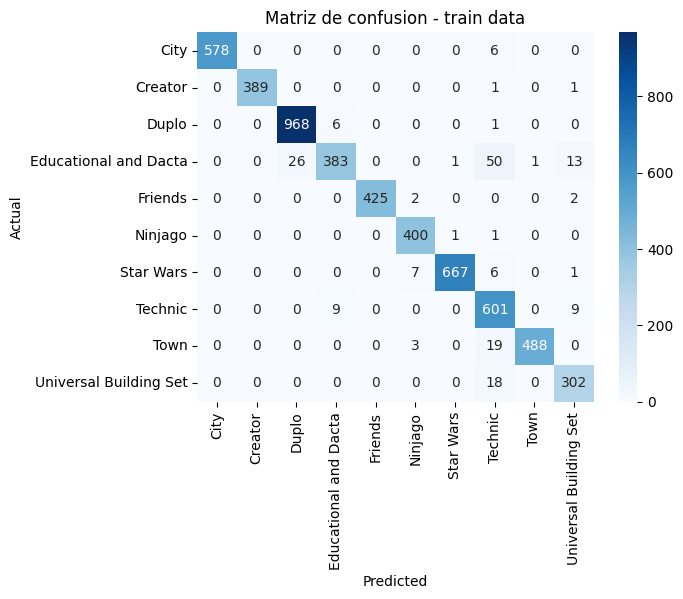

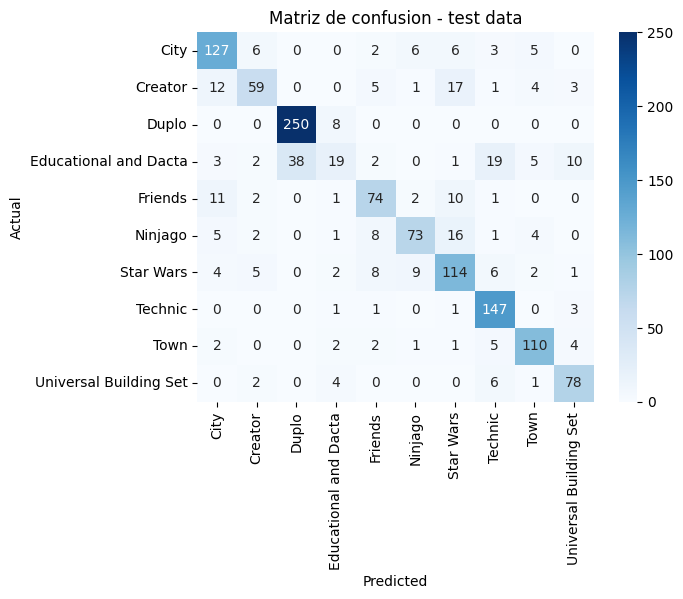

In [28]:
evaluar(y_test, y_train, y_rfc_pred, y_rfc_pred_is)

# Bagging

[inicio](#Tabla-de-contenido)

In [1]:

clftree = tree.DecisionTreeClassifier()

In [3]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [19]:
bag_clf.fit(X_train, y_train)

c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\pycaret\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [20]:
y_bag_pred = bag_clf.predict(X_test)
y_bag_pred_is = bag_clf.predict(X_train)

Accuracy: 0.7743132887899035
Precision: 0.7640140851570408
Recall: 0.7743132887899035
F1: 0.7624580079432608
                        precision    recall  f1-score   support

                  City       0.80      0.79      0.79       155
               Creator       0.69      0.64      0.66       102
                 Duplo       0.88      0.98      0.93       258
 Educational and Dacta       0.57      0.24      0.34        99
               Friends       0.77      0.73      0.75       101
               Ninjago       0.69      0.65      0.67       110
             Star Wars       0.67      0.73      0.70       151
               Technic       0.76      0.93      0.84       153
                  Town       0.84      0.84      0.84       127
Universal Building Set       0.82      0.81      0.82        91

              accuracy                           0.77      1347
             macro avg       0.75      0.73      0.73      1347
          weighted avg       0.76      0.77      0.76    

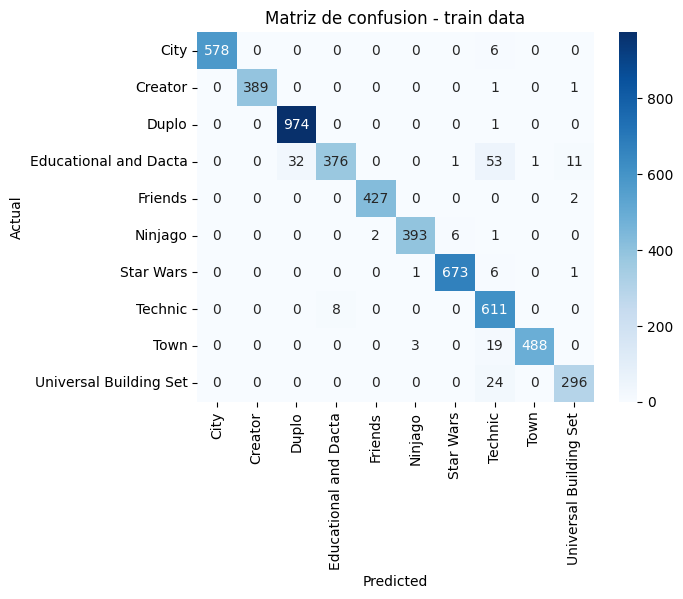

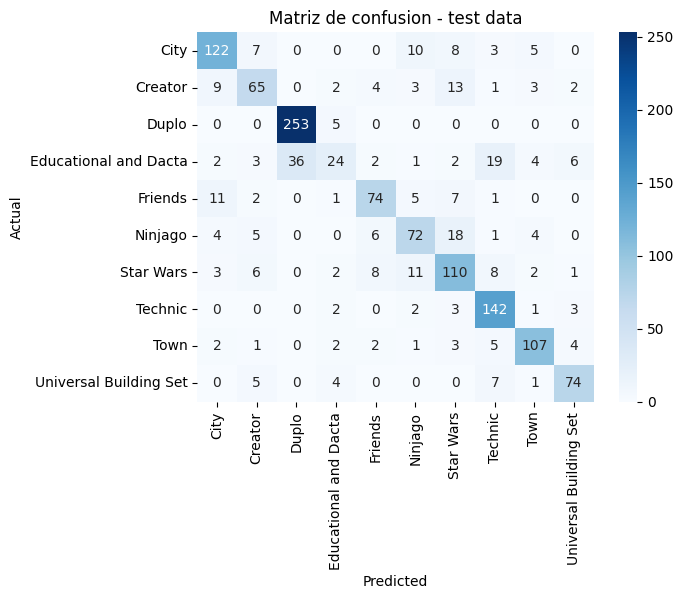

In [22]:
evaluar(y_test, y_train, y_bag_pred, y_bag_pred_is)

# Comparacion de los modelos

In [ ]:
#Funcion para compara los modelos (Falta!!)

# Auto ML : PYCARET

[inicio](#Tabla-de-contenido)

In [ ]:
# Instanciamos la configuración: setup
clf1 = setup(data, target = 'themes', log_experiment = True, experiment_name = 'Lego themes',use_gpu=True)

,Description,Value
0,Session id,7086
1,Target,themes
2,Target type,Multiclass
3,Original data shape,"(6732, 80)"
4,Transformed data shape,"(6732, 80)"
5,Transformed train set shape,"(4712, 80)"
6,Transformed test set shape,"(2020, 80)"
7,Numeric features,79
8,Preprocess,True
9,Imputation type,simple


2023/06/19 11:14:32 INFO mlflow.tracking.fluent: Experiment with name 'Lego themes' does not exist. Creating a new experiment.


In [ ]:
# model training
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8820,0.9910,0.8820,0.8808,0.8782,0.8670,0.8676,18.0370
xgboost,Extreme Gradient Boosting,0.8809,0.9894,0.8809,0.8795,0.8778,0.8658,0.8663,5.4070
lightgbm,Light Gradient Boosting Machine,0.8786,0.9890,0.8786,0.8770,0.8757,0.8632,0.8636,21.2490
et,Extra Trees Classifier,0.8627,0.9827,0.8627,0.8601,0.8539,0.8450,0.8464,1.5380
gbc,Gradient Boosting Classifier,0.8608,0.9846,0.8608,0.8574,0.8559,0.8430,0.8437,40.2690
rf,Random Forest Classifier,0.8591,0.9854,0.8591,0.8560,0.8496,0.8409,0.8424,2.1510
dt,Decision Tree Classifier,0.7534,0.8644,0.7534,0.7569,0.7536,0.7227,0.7230,0.4100
lda,Linear Discriminant Analysis,0.7479,0.9462,0.7479,0.7287,0.7267,0.7154,0.7182,0.3310
ridge,Ridge Classifier,0.7190,0.0000,0.7190,0.7068,0.6794,0.6817,0.6876,0.1900
nb,Naive Bayes,0.6993,0.9329,0.6993,0.7120,0.6754,0.6616,0.6677,0.2060


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
print(catboost)

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8792,0.9921,0.8792,0.8790,0.8775,0.8640,0.8643
1,0.8877,0.9887,0.8877,0.8848,0.8818,0.8732,0.8741
2,0.8641,0.9906,0.8641,0.8615,0.8570,0.8466,0.8477
3,0.8641,0.9884,0.8641,0.8634,0.8607,0.8471,0.8476
4,0.9023,0.9937,0.9023,0.9033,0.8976,0.8898,0.8907
5,0.8981,0.9923,0.8981,0.8983,0.8952,0.8852,0.8858
6,0.8620,0.9904,0.8620,0.8573,0.8565,0.8441,0.8450
7,0.9066,0.9921,0.9066,0.9065,0.9043,0.8948,0.8952
8,0.8726,0.9896,0.8726,0.8717,0.8710,0.8565,0.8567


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
catboost_tune = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8623,0.9911,0.8623,0.8641,0.8563,0.8447,0.8459
1,0.8602,0.9855,0.8602,0.8563,0.8536,0.8420,0.8430
2,0.8471,0.9860,0.8471,0.8455,0.8402,0.8274,0.8286
3,0.8599,0.9858,0.8599,0.8590,0.8575,0.8423,0.8427
4,0.8960,0.9917,0.8960,0.8959,0.8911,0.8826,0.8835
5,0.8875,0.9894,0.8875,0.8883,0.8857,0.8734,0.8738
6,0.8471,0.9874,0.8471,0.8387,0.8388,0.8273,0.8285
7,0.8747,0.9901,0.8747,0.8725,0.8721,0.8590,0.8593
8,0.8450,0.9862,0.8450,0.8457,0.8449,0.8257,0.8257


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
catboost_tune.get_params()

{'border_count': 32,
 'verbose': False,
 'task_type': 'GPU',
 'random_state': 7086}

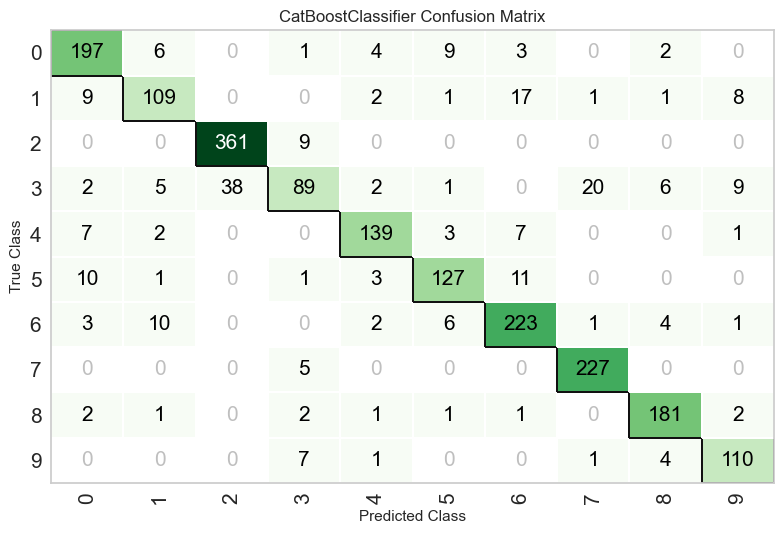

In [ ]:
# plot confusion matrix
plot_model(catboost_tune, plot = 'confusion_matrix', use_train_data = False, plot_kwargs = clases)

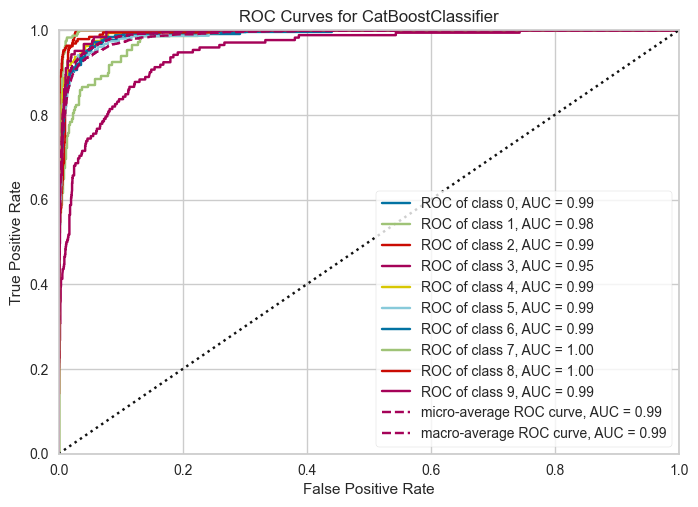

In [ ]:
# plot AUC
plot_model(catboost_tune, plot = 'auc')

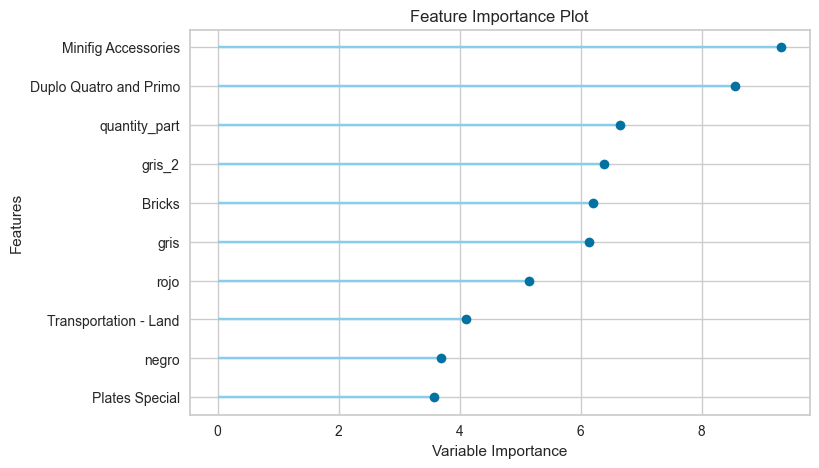

In [ ]:
plot_model(catboost_tune, plot = 'feature')